In [6]:
import pathlib
import pandas as pd
import re

In [7]:
gene_rifs = pd.read_csv(
    'data/generifs_basic_unix-1603306431.gz',
    sep='\t',
    low_memory=False
)

In [8]:
gene_info = pd.read_csv(
    'data/Homo_sapiens.gene_info_unix-1603306431.gz',
    sep='\t',
    low_memory=False
)

In [9]:
### Test RegEx

# aging_regex = re.compile(r'\s+age|\s+aging+', re.IGNORECASE)

#print(len(aging_regex.findall('This gene is responsible for aging and age causes')) == 2)
#print(len(aging_regex.findall('The age of age is aging')) == 3)
#print(len(aging_regex.findall('The Ice Age was an important Aging event')) == 2)
#print(len(aging_regex.findall('flagellar system, but not of the chemotaxis system.')) == 0)
#print(len(aging_regex.findall('in vivo fluorescence imaging')) == 0)

'''
sr = pd.Series(['This gene is responsible for aging and age causes', 
                'The age of age is aging',
                'The Ice Age was an important Aging event', 
                'flagellar system, but not of the chemotaxis system.',
                'in vivo fluorescence imaging'])
'''
#sr = sr.str.contains('\s+age|\s+aging+', case=False)
#print(sr)

"\nsr = pd.Series(['This gene is responsible for aging and age causes', \n                'The age of age is aging',\n                'The Ice Age was an important Aging event', \n                'flagellar system, but not of the chemotaxis system.',\n                'in vivo fluorescence imaging'])\n"

In [10]:
human_coding_geneIDs = gene_info[(gene_info['#tax_id'] == 9606) & (gene_info['type_of_gene'] == 'protein-coding')]['GeneID'].values

In [11]:
human_coding_rifs = gene_rifs[gene_rifs['Gene ID'].isin(human_coding_geneIDs)]

In [12]:
aging_rifs = human_coding_rifs['GeneRIF text'].str.contains('\s+age|\s+aging+', case=False)

In [13]:
aging_counter = pd.DataFrame(data={
 'aging': human_coding_rifs[aging_rifs]['Gene ID'].value_counts(),
 'non_aging': human_coding_rifs[~aging_rifs]['Gene ID'].value_counts()}).fillna(0)

In [15]:
aging_counter.to_json('../shared_data/aging_counter.json')

In [24]:
import math as math, copy

aging_counter_log = copy.deepcopy(aging_counter)
aging_counter_log_ceil = copy.deepcopy(aging_counter)

def apply_log(aging_counter_df, use_ceil):
    for row in aging_counter_df.itertuples():
        
        index = row.Index
        aging = row.aging
        non_aging = row.non_aging

        if aging > 1:
            aging = math.log10(aging)
        if non_aging > 1:
            non_aging = math.log10(non_aging)    
        if use_ceil:
            aging = math.ceil(aging)
            non_aging = math.ceil(non_aging)
        
        aging_counter_df.xs(index).aging = aging
        aging_counter_df.xs(index).non_aging = non_aging

apply_log(aging_counter_log, False)
apply_log(aging_counter_log_ceil, True)

Text(0.5, 1.0, 'Original Data')

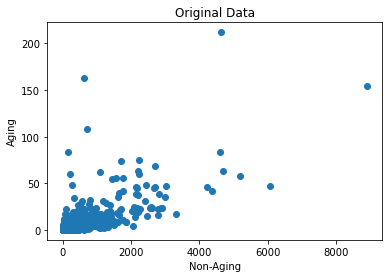

In [25]:
import matplotlib.pyplot as plt

plt.scatter(x='non_aging', y='aging', data=aging_counter)
plt.xlabel('Non-Aging')
plt.ylabel('Aging')
plt.title('Original Data')

Text(0.5, 1.0, 'Log Data')

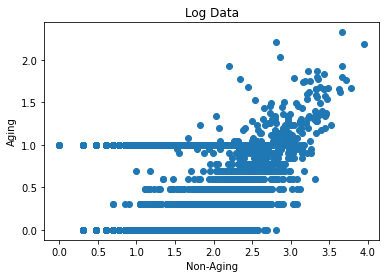

In [26]:
plt.scatter(x='non_aging', y='aging', data=aging_counter_log)
plt.xlabel('Non-Aging')
plt.ylabel('Aging')
plt.title('Log Data')

Text(0.5, 1.0, 'Log w/Ceil Data')

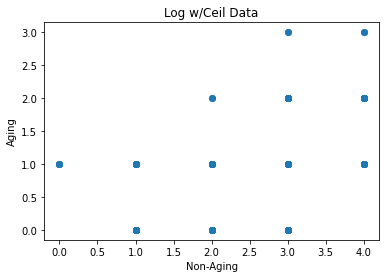

In [27]:
plt.scatter(x='non_aging', y='aging', data=aging_counter_log_ceil)
plt.xlabel('Non-Aging')
plt.ylabel('Aging')
plt.title('Log w/Ceil Data')